In [12]:
from keras.models import Sequential, load_model
from keras import layers
from keras import backend as K
from keras import optimizers
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.preprocessing import image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [34]:
df = pd.read_csv('result_oil_price.csv', encoding='UTF-8',index_col=0)
df = df.set_index('time')

In [35]:
df.isnull().sum().sum()

0

In [37]:
df.head()

,고급휘발유,보통휘발유,자동차용경유,실내등유,가격,건설,경제,구조조정,금리,기술,...,억대,전주,중구,지연,축산물,확대,현재가_x,현재가_y,price,er
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1816.37,1486.06,1279.34,841.71,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21750.197266,2311.357178,50.80032,1119.116721
2017-01-02,1817.61,1487.92,1281.55,843.22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21750.212891,2026.160000,50.80032,1195.230000
2017-01-03,1825.89,1492.17,1285.44,845.33,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19881.760000,2043.970000,52.36000,1197.610000
2017-01-04,1828.94,1495.37,1288.66,847.66,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19942.160000,2045.640000,53.26000,1194.930000
2017-01-05,1831.73,1497.70,1290.76,849.51,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19899.290000,2041.950000,53.77000,1180.880000


In [41]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
x = scalerX.fit_transform(df)
scalery = MinMaxScaler()
y = scalery.fit_transform(df.iloc[:,[-2]])

Text(0, 0.5, 'Close')

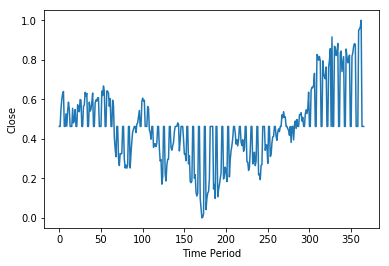

In [44]:
plt.plot(y)
plt.xlabel("Time Period")
plt.ylabel("Close")

In [60]:
# Your answer comes here.
SEQ_LEN = 5

# build a dataset
dataX = []
dataY = []

for i in range(0, len(y) - SEQ_LEN):
    _x = x[i:i + SEQ_LEN]
    _y = y[i + SEQ_LEN]
    dataX.append(_x)
    dataY.append(_y)

dataX = np.array(dataX)
dataY = np.array(dataY)

In [61]:
dataY.shape

(361, 1)

In [73]:
train_size = int(len(dataY) * 0.9)
test_size = len(dataY) - train_size
Xtrain, Xtest = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
ytrain, ytest = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [74]:
np.shape(Xtrain), np.shape(Xtest)

((324, 5, 282), (37, 5, 282))

In [75]:
# Your answer comes here.
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import backend as K
K.clear_session()
model = Sequential()
model.add(LSTM(32, input_shape=(5, 282), return_sequences=True))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 32)             40320     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 43,473
Trainable params: 43,473
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Your answer comes here.
from keras.callbacks import TensorBoard
import time
now = time.strftime("%c")
callbacks_list = [
    ModelCheckpoint(filepath='stock'+now+'.h5',monitor='val_loss',save_best_only=True)
]
history=model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest),epochs=200, verbose=1,callbacks=callbacks_list)

Train on 324 samples, validate on 37 samples
Epoch 1/200
324/324 [==============================] - 1s 3ms/step - loss: 0.0735 - mean_absolute_error: 0.2286 - val_loss: 0.0513 - val_mean_absolute_error: 0.2157
Epoch 2/200
324/324 [==============================] - 0s 585us/step - loss: 0.0235 - mean_absolute_error: 0.1206 - val_loss: 0.0468 - val_mean_absolute_error: 0.2083
Epoch 3/200
324/324 [==============================] - 0s 618us/step - loss: 0.0160 - mean_absolute_error: 0.1011 - val_loss: 0.0652 - val_mean_absolute_error: 0.2331
Epoch 4/200
324/324 [==============================] - 0s 543us/step - loss: 0.0140 - mean_absolute_error: 0.0949 - val_loss: 0.0485 - val_mean_absolute_error: 0.2121
Epoch 5/200
324/324 [==============================] - 0s 538us/step - loss: 0.0130 - mean_absolute_error: 0.0910 - val_loss: 0.0486 - val_mean_absolute_error: 0.2125
Epoch 6/200
324/324 [==============================] - 0s 537us/step - loss: 0.0121 - mean_absolute_error: 0.0887 - val_lo

Epoch 98/200
324/324 [==============================] - 0s 521us/step - loss: 0.0052 - mean_absolute_error: 0.0531 - val_loss: 0.0808 - val_mean_absolute_error: 0.2146
Epoch 99/200
324/324 [==============================] - 0s 549us/step - loss: 0.0051 - mean_absolute_error: 0.0520 - val_loss: 0.0880 - val_mean_absolute_error: 0.2223
Epoch 100/200
324/324 [==============================] - 0s 519us/step - loss: 0.0059 - mean_absolute_error: 0.0595 - val_loss: 0.0784 - val_mean_absolute_error: 0.2155
Epoch 101/200
324/324 [==============================] - 0s 516us/step - loss: 0.0050 - mean_absolute_error: 0.0514 - val_loss: 0.0780 - val_mean_absolute_error: 0.2147
Epoch 102/200
324/324 [==============================] - 0s 551us/step - loss: 0.0051 - mean_absolute_error: 0.0518 - val_loss: 0.0780 - val_mean_absolute_error: 0.2169
Epoch 103/200
324/324 [==============================] - 0s 523us/step - loss: 0.0049 - mean_absolute_error: 0.0512 - val_loss: 0.0800 - val_mean_absolute_er

324/324 [==============================] - 0s 526us/step - loss: 0.0039 - mean_absolute_error: 0.0435 - val_loss: 0.0725 - val_mean_absolute_error: 0.2019
Epoch 195/200
324/324 [==============================] - 0s 528us/step - loss: 0.0037 - mean_absolute_error: 0.0402 - val_loss: 0.0734 - val_mean_absolute_error: 0.2036
Epoch 196/200
324/324 [==============================] - 0s 557us/step - loss: 0.0034 - mean_absolute_error: 0.0375 - val_loss: 0.0678 - val_mean_absolute_error: 0.2044
Epoch 197/200
324/324 [==============================] - 0s 533us/step - loss: 0.0033 - mean_absolute_error: 0.0366 - val_loss: 0.0687 - val_mean_absolute_error: 0.2033
Epoch 198/200
324/324 [==============================] - 0s 555us/step - loss: 0.0034 - mean_absolute_error: 0.0381 - val_loss: 0.0674 - val_mean_absolute_error: 0.2047
Epoch 199/200
324/324 [==============================] - 0s 527us/step - loss: 0.0035 - mean_absolute_error: 0.0387 - val_loss: 0.0665 - val_mean_absolute_error: 0.2048


In [77]:
model = load_model('stockThu May 30 01:32:54 2019.h5')  # best model 불러오기
test_predict = model.predict(Xtest)
test_predict_back = scalery.inverse_transform(test_predict)
ytest_back = scalery.inverse_transform(ytest)

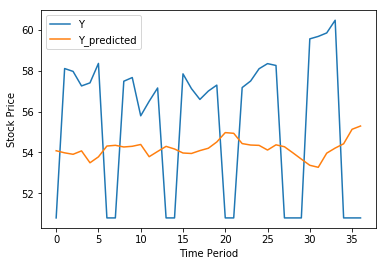

In [78]:
# Plot predictions
plt.plot(ytest_back, label = 'Y')
plt.plot(test_predict_back, label = 'Y_predicted')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()